In [ ]:
import tensorflow as tf
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop



Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [2]:
fldr="./UTKFace"

In [3]:
import os
flies=os.listdir(fldr)

In [4]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/41_0_3_20170119175402515.jpg.chip.jpg
./UTKFace/41_0_3_20170119181048675.jpg.chip.jpg
./UTKFace/41_0_3_20170119204219798.jpg.chip.jpg
./UTKFace/41_0_3_20170119204228535.jpg.chip.jpg
./UTKFace/41_0_3_20170119204231207.jpg.chip.jpg
./UTKFace/41_0_3_20170119204235487.jpg.chip.jpg
./UTKFace/41_0_3_20170119211820393.jpg.chip.jpg
./UTKFace/41_0_4_20170104173222571.jpg.chip.jpg
./UTKFace/41_0_4_20170104185252334.jpg.chip.jpg
./UTKFace/41_0_4_20170104202035282.jpg.chip.jpg
./UTKFace/41_0_4_20170104205137196.jpg.chip.jpg
./UTKFace/41_0_4_20170104205417148.jpg.chip.jpg
./UTKFace/41_0_4_20170111181750392.jpg.chip.jpg
./UTKFace/41_0_4_20170117022116049.jpg.chip.jpg
./UTKFace/41_1_0_20170103163256248.jpg.chip.jpg
./UTKFace/41_1_0_20170103181204176.jpg.chip.jpg
./UTKFace/41_1_0_20170103182136025.jpg.chip.jpg
./UTKFace/41_1_0_20170103183002200.jpg.chip.jpg
./UTKFace/41_1_0_20170103183924011.jpg.chip.jpg
./UTKFace/41_1_0_20170104170026513.jpg.chip.jpg
./UTKFace/41_1_0_20170104171619994.jpg.c

In [5]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

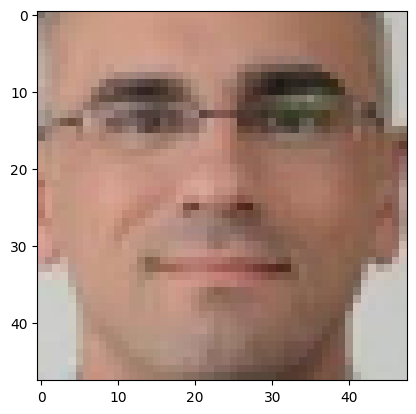

In [6]:
plt.imshow(images[87])

In [7]:
print(ages[87])

42


In [8]:
print(genders[87])

0


In [9]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)


In [11]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[4775 2996]


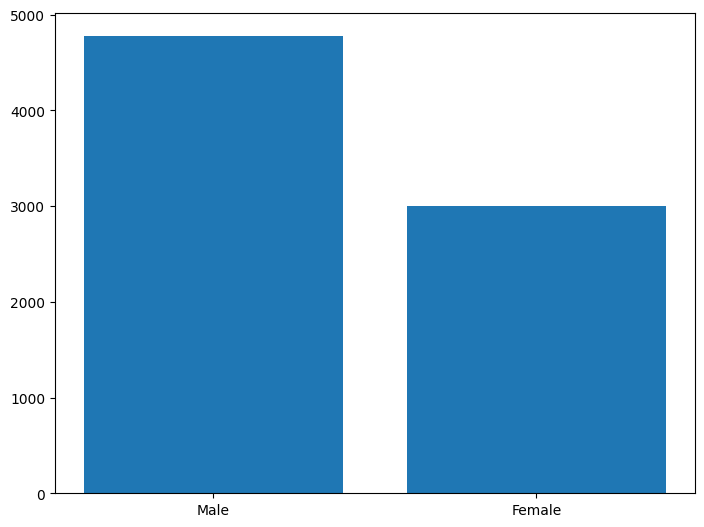

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[4775,2996]
ax.bar(gender,values)
plt.show()


In [13]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[273 196 131 139 263 166  59 266 157 100 440 153 170 153 148 381 138 232
 241 353 268 236  97 271  82 293 161 125 103  50 259  77  94 100  56 147
  33  98  63  32 148  58  28  69  23 133  22  40  18  24 155  35  10  34
  33  82   2  13   5   9  17   9]


In [14]:
val=values.tolist()
cnt=counts.tolist()

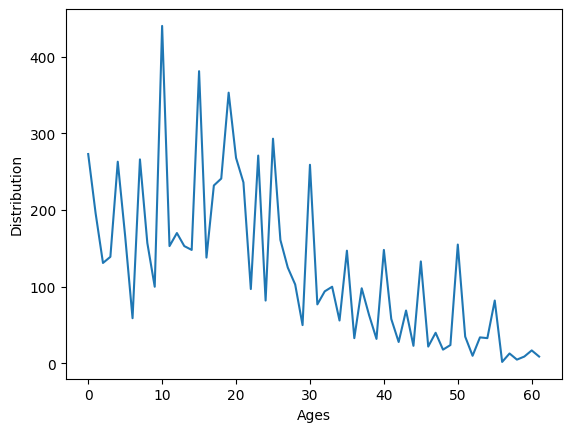

In [15]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [16]:
len(gender)

2

In [17]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1
    

In [18]:
images_f_2=images_f/255


In [19]:
images_f_2.shape

(7771, 48, 48, 3)

In [20]:
labels_f=np.array(labels)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [23]:
Y_train[0:5]

array([[81,  1],
       [58,  1],
       [61,  0],
       [61,  0],
       [80,  1]])

In [24]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [25]:
Y_train_2[0][0:5]

array([1, 1, 0, 0, 1])

In [26]:
Y_train_2[1][0:5]

array([81, 58, 61, 61, 80])

In [27]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [28]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [29]:
Model=model((48,48,3))

In [30]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
fle_s='Age_sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]


In [33]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=50,callbacks=callback_list)

Epoch 1/50
91/92 [============================>.] - ETA: 0s - loss: 18.5103 - sex_out_loss: 0.6705 - age_out_loss: 17.6775 - sex_out_accuracy: 0.6171 - age_out_accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 20.18654, saving model to Age_sex_Detection.h5
92/92 [==============================] - 30s 321ms/step - loss: 18.5121 - sex_out_loss: 0.6706 - age_out_loss: 17.6792 - sex_out_accuracy: 0.6168 - age_out_accuracy: 0.0000e+00 - val_loss: 20.1865 - val_sex_out_loss: 0.6707 - val_age_out_loss: 19.3612 - val_sex_out_accuracy: 0.6063 - val_age_out_accuracy: 0.0000e+00
Epoch 2/50


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3078: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


91/92 [============================>.] - ETA: 0s - loss: 18.1546 - sex_out_loss: 0.6691 - age_out_loss: 17.3343 - sex_out_accuracy: 0.6174 - age_out_accuracy: 0.0000e+00
Epoch 2: val_loss did not improve from 20.18654
92/92 [==============================] - 25s 275ms/step - loss: 18.1525 - sex_out_loss: 0.6692 - age_out_loss: 17.3322 - sex_out_accuracy: 0.6172 - age_out_accuracy: 0.0000e+00 - val_loss: 31.0124 - val_sex_out_loss: 0.6713 - val_age_out_loss: 30.1923 - val_sex_out_accuracy: 0.6063 - val_age_out_accuracy: 0.0000e+00
Epoch 3/50
71/92 [======================>.......] - ETA: 5s - loss: 18.2048 - sex_out_loss: 0.6662 - age_out_loss: 17.3902 - sex_out_accuracy: 0.6202 - age_out_accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
Model.evaluate(X_test,Y_test_2)

61/61 [==============================] - 1s 23ms/step - loss: 11.6375 - sex_out_loss: 6.5699e-10 - age_out_loss: 11.0902 - sex_out_accuracy: 1.0000 - age_out_accuracy: 0.0000e+00


[11.637456893920898, 6.569925714572378e-10, 11.090219497680664, 1.0, 0.0]

In [ ]:
pred=Model.predict(X_test)
pred[1]

61/61 [==============================] - 2s 23ms/step


array([[48.83983 ],
       [56.657146],
       [29.831724],
       ...,
       [57.328728],
       [ 6.112056],
       [40.838245]], dtype=float32)

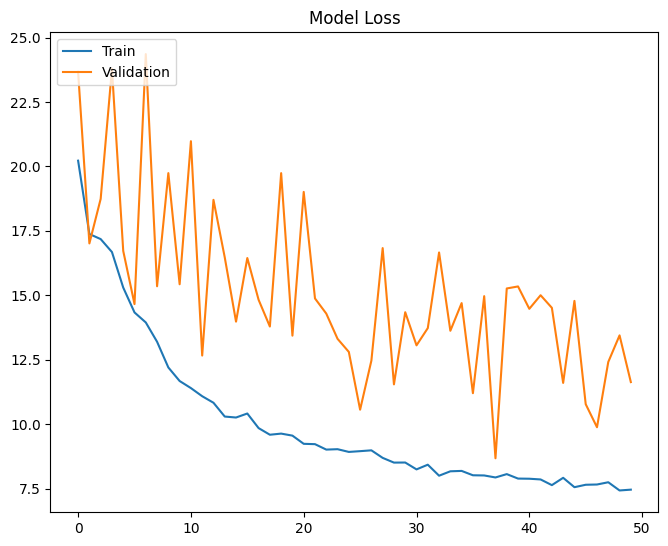

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

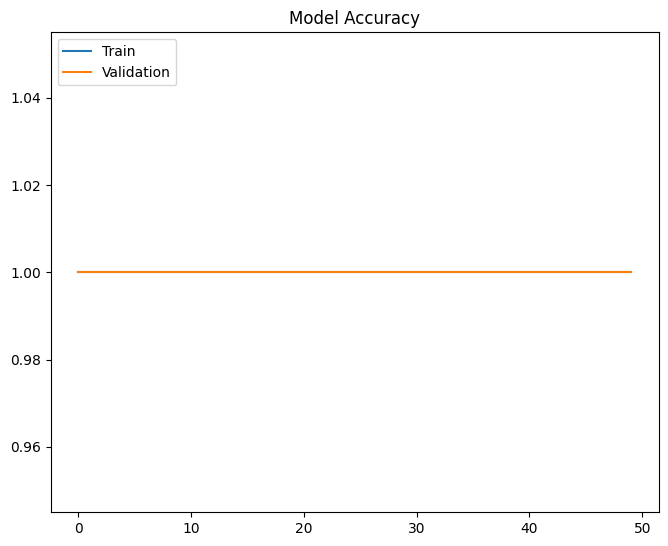

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

<function matplotlib.pyplot.show(close=None, block=None)>

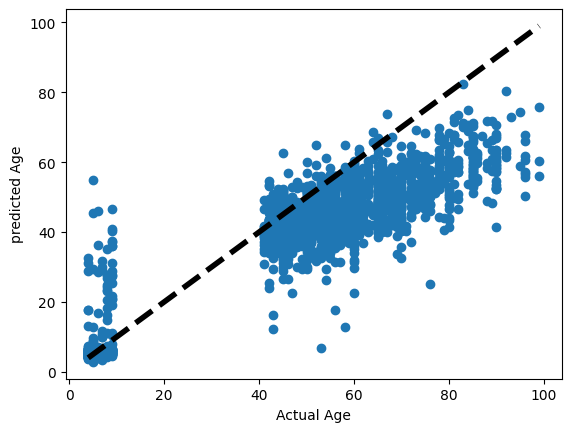

In [ ]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('predicted Age')
plt.show

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[0],Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1943

    accuracy                           1.00      1943
   macro avg       1.00      1.00      1.00      1943
weighted avg       1.00      1.00      1.00      1943



In [ ]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

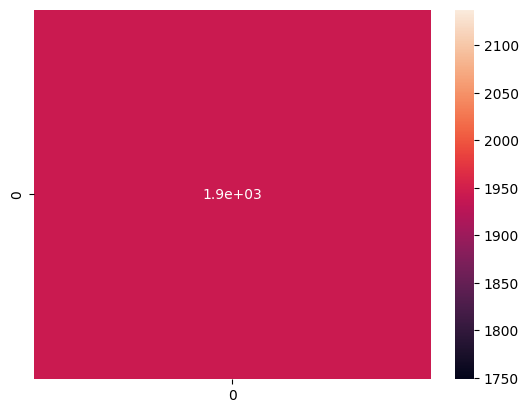

In [ ]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    Pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(Pred_l[1][0]))
    sex=int(np.round(Pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("predicted Gender is "+ sex_f[sex])

# Test 1

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_20836\1659634507.py", line 1, in <module>
    test_image(4,images_f,images_f_2,Model)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_20836\2693843155.py", line 4, in test_image
    Pred_l=Model.predict(np.array([image_test]))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.predict() m

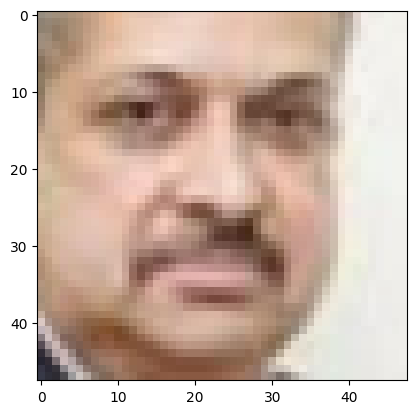

In [ ]:
test_image(4,images_f,images_f_2,Model)

Test 2

1/1 [==============================] - 0s 26ms/step
Predicted Age is 34
predicted Gender is Male


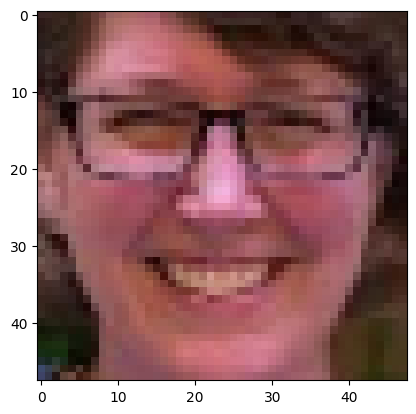

In [ ]:
test_image(23,images_f,images_f_2,Model)

Test 3

1/1 [==============================] - 0s 27ms/step
Predicted Age is 33
predicted Gender is Male


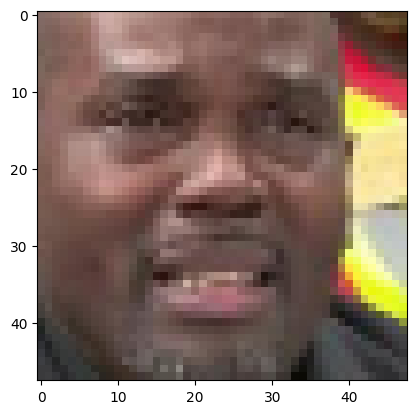

In [ ]:
test_image(168,images_f,images_f_2,Model)

Test 4

1/1 [==============================] - 0s 24ms/step
Predicted Age is 41
predicted Gender is Male


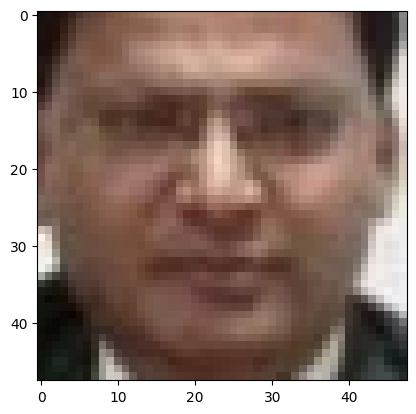

In [ ]:
test_image(888,images_f,images_f_2,Model)

Test 5

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_20836\1451108511.py", line 1, in <module>
    test_image(567,images_f,images_f_2,Model)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_20836\2693843155.py", line 4, in test_image
    Pred_l=Model.predict(np.array([image_test]))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.predict()

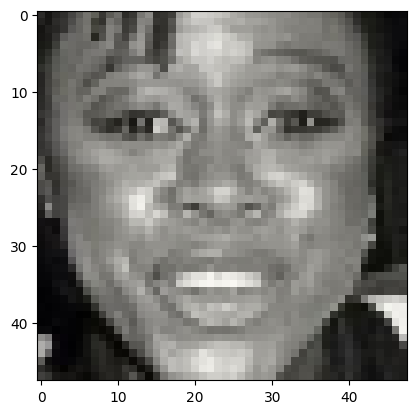

In [ ]:
test_image(567,images_f,images_f_2,Model)

Test 6

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_20836\502813986.py", line 1, in <module>
    test_image(743,images_f,images_f_2,Model)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_20836\2693843155.py", line 4, in test_image
    Pred_l=Model.predict(np.array([image_test]))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.predict() 

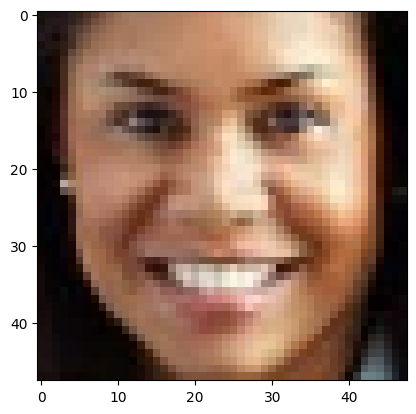

In [ ]:
test_image(743,images_f,images_f_2,Model)